In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def least_squares_fit(x, y, degree, num_points=None):
    if num_points is None:
        num_points = len(x)  # Используем все точки по умолчанию

    # Выбираем только первые num_points точек для аппроксимации
    x_subset = x[:num_points]
    y_subset = y[:num_points]

    # Создаем матрицу X со степенями x_subset
    X = np.vander(x_subset, degree + 1)

    # Решаем уравнение X^T * X * coeffs = X^T * y_subset для coeffs
    # Решение этой системы линейных уравнений производится для получения коэффициентов coeffs.
    coeffs = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_subset))

    return coeffs

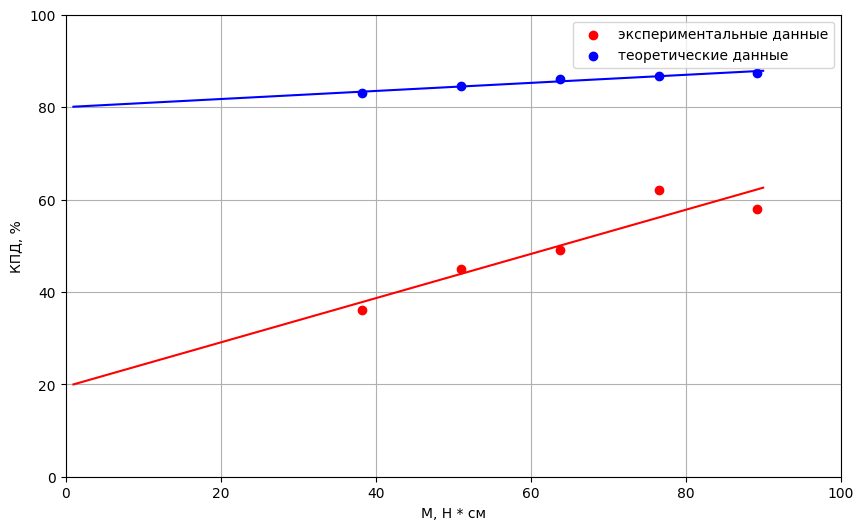

In [17]:
# данные
n_experiment = np.array([36, 45, 49, 62, 58])
n_rasch = np.array([83, 84.6, 86, 86.8, 87.47])
M_H = np.array([38.25, 51, 63.75, 76.5, 89.25])

degree = 1 # Выбираем степень полинома
coeffs_experiment = least_squares_fit(M_H, n_experiment, degree)
coeffs_rasch = least_squares_fit(M_H, n_rasch, degree)

# Создание полинома
poly_exp = np.poly1d(coeffs_experiment)
poly_rasch = np.poly1d(coeffs_rasch)

# Генерация значений для аппроксимации
M_H_range = np.arange(1, 90 + 1, 1)
n_exp_approximated = poly_exp(M_H_range)
n_rasch_approximated = poly_rasch(M_H_range)


plt.figure(figsize=(10, 6))
plt.scatter(M_H, n_experiment, label='экспериментальные данные', color='red')
plt.plot(M_H_range, n_exp_approximated, color='red')
plt.scatter(M_H, n_rasch, label='теоретические данные', color='blue')
plt.plot(M_H_range, n_rasch_approximated, color='blue')
plt.xlabel('M, Н * см')
plt.ylabel('КПД, %')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend()
plt.grid(True)
plt.show()